In [1]:
import sys
sys.path.append('../../')

import pandas as pd
import tensorflow as tf
from cityhash import CityHash32,CityHash64
import numpy as np
import tfutils

from lmtk.feature_extraction.constants import FEATURE_MASK, MAX_HASH_SIZE
tf.config.list_logical_devices()

2023-08-23 18:52:46.537143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 18:52:46.656956: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-23 18:52:47.274342: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64
2023-08-23 18:52:47.274426: W tensorflow/compiler/xla/stream_ex

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [2]:
cat_feature = [
    'svr_region',
    'trigger_type',
    'language'
]

common_feature_boolean = [
    "role_create_os_android",
    "role_create_os_ios",
    "if_accounts_first_role",
    "if_pruchase_active_in_1day",
    "if_pruchase_active_in_30day",
    "if_pruchase_active_in_3day",
    "if_pruchase_active_in_7day",
    "is_acc_transfer_from_old",
    "is_acc_transfer_to_new",
    "is_role_transfer_from_old",
    "is_role_transfer_to_new",
    "is_valid",

    "role_type_fraud",
    "role_type_no_install_info",
]

common_feature_numeric = [
    "acc_first_purchase_price_usd",
    "acc_role_cnt",
    "acc_total_charge_cnt",
    "acc_total_charge_sum_usd",
    "acc_total_refund_cnt",
    "acc_total_refund_sum_usd",
    "bundle_pop_buy_count_last_day",
    "bundle_pop_buy_count_last_day_campaign_stage_trigger",
    "bundle_pop_buy_count_last_day_tech_unlock_trigger",
    "bundle_pop_buy_count_last_week",
    "bundle_pop_buy_count_last_week_adjust",
    "bundle_pop_buy_max_last_day",
    "bundle_pop_buy_max_last_week",
    "bundle_pop_buy_max_last_week_adjust",
    "bundle_pop_buy_max_price_campaign_stage_trigger",
    "bundle_pop_buy_max_price_campaign_stage_trigger_commax",
    "bundle_pop_buy_max_price_tech_unlock_trigger",
    "bundle_pop_buy_max_price_tech_unlock_trigger_commax",
    "bundle_pop_buy_sum_last_day",
    "bundle_pop_buy_sum_last_week",
    "bundle_pop_buy_sum_last_week_adjust",
    "bundle_pop_count_campaign_stage_trigger_9999",
    "bundle_pop_count_last_day",
    "bundle_pop_count_last_day_campaign_stage_trigger",
    "bundle_pop_count_last_day_tech_unlock_trigger",
    "bundle_pop_count_last_week",
    "bundle_pop_count_last_week_adjust",
    "bundle_pop_count_tech_unlock_trigger_9999",

    "level",
    "max_role_level",
    "money_flow_in_cout_last_day",
    "money_flow_in_cout_last_week",
    "money_flow_in_cout_last_week_adjust",
    "money_flow_out_cout_last_day",
    "money_flow_out_cout_last_week",
    "money_flow_out_cout_last_week_adjust",
    "purchase_price_1499_last_week",
    "purchase_price_1499_last_week_adjust",
    "purchase_price_1999_last_week",
    "purchase_price_1999_last_week_adjust",
    "purchase_price_2999_last_week",
    "purchase_price_2999_last_week_adjust",
    "purchase_price_4999_last_week",
    "purchase_price_4999_last_week_adjust",
    "purchase_price_499_last_week",
    "purchase_price_499_last_week_adjust",
    "purchase_price_9999_last_week",
    "purchase_price_9999_last_week_adjust",
    "purchase_price_999_last_week",
    "purchase_price_999_last_week_adjust",
    "purchase_price_max",
    "purchase_price_max_last_3days",
    "purchase_price_max_last_day",
    "purchase_price_max_last_month",
    "purchase_price_max_last_week",
    "purchase_price_max_last_week_adjust",
    "purchase_price_sum_last_3days",
    "purchase_price_sum_last_day",
    "purchase_price_sum_last_month",
    "purchase_price_sum_last_week",
    "purchase_price_sum_last_week_adjust",

    
    "role_first_purchase_price_usd",
    "role_last_login_duration",
    "role_last_purchase_price_usd",
    "role_lifespan",
    "role_login_last_now",
    "role_login_secondlast_last",
    "role_login_secondlast_now",
    "role_logout_last_now",
    "role_no",
    "role_purchase_first_last",
    "role_purchase_first_now",
    "role_purchase_last_now",
    "role_total_charge_cnt",
    "role_total_charge_sum_usd",
    "role_total_refund_cnt",
    "role_total_refund_sum_usd",
    
    "vip_level",
    "purchase_price_sum_max_ratio",
]

common_feature_ratio = [
    
    "purchase_price_sum_max_ratio_com2",


    'resource_rarity',
    'speedup_rarity',
    'top_key_rarity',
    'officer_bar_ticket_rarity',
    'common_equipment_exp_consume_levelup_1_diff_num_relatively',
    'common_equipment_exp_consume_blueprint_1_diff_num_relatively',
    'common_equipment_exp_rarity',
    'airforce_equipment_exp_consume_levelup_1_diff_num_relatively',
    'airforce_equipment_exp_consume_blueprint_1_diff_num_relatively',
    'airforce_equipment_exp_rarity',
    'ammunition_consume_levelup_1_diff_num_relatively',
    'ammunition_consume_levelup_10_diff_num_relatively',
    'ammunition_consume_blueprint_1_diff_num_relatively',
    'ammunition_consume_blueprint_10_diff_num_relatively',
    'ammunition_rarity',
    'airforce_ammunition_consume_levelup_1_diff_num_relatively',
    'airforce_ammunition_consume_levelup_10_diff_num_relatively',
    'airforce_ammunition_consume_blueprint_1_diff_num_relatively',
    'airforce_ammunition_consume_blueprint_10_diff_num_relatively',
    'airforce_ammunition_rarity',
    'elements_consume_blueprint_1_diff_num_relatively',
    'elements_consume_blueprint_10_diff_num_relatively',
    'elements_consume_reform_diff_num_relatively',
    'elements_rarity',
    'airforce_elements_consume_blueprint_1_diff_num_relatively',
    'airforce_elements_consume_blueprint_10_diff_num_relatively',
    'airforce_elements_consume_reform_diff_num_relatively',
    'airforce_elements_rarity',
    'replacement_wrench_consume_mechanic_1_diff_num_relatively',
    'replacement_wrench_rarity',
    'officer_exp_consume_lvlup_1_diff_num_relatively',
    'officer_exp_rarity',
    'component_consume_diff_num_relatively',
    'chest_choice_replacement_rarity',

    "buy_rate_last_day",
    "buy_rate_last_day_campaign_stage_trigger",
    "buy_rate_last_day_tech_unlock_trigger",
    "buy_rate_last_week",
]

diamond_remain_feature = [
    'diamond_paid_remain_rmb',
    'diamond_paid_remain_usd'
]

bundle_buy_history = [
    'last1bundle',
    'last2bundle',
    'last3bundle',
    'last4bundle',
    'last5bundle',
]

In [4]:
price_chain = ['499','999','1499', '1999', '2999','4999', '9999']
p2idx = {p:i for i,p in enumerate(price_chain)}
idx2p = {i:p for i,p in enumerate(price_chain)}

def extract(x):
    x = x.replace('\x002', '\x02')
    if x is not None:
        x = [v.split('\x03') for v in x.split('\x02')]
        x = {
            v[0] : v[1].split('\x04')
            for v in x
        }
    else:
        x = {}

    return x

dataset = (
    pd
    .read_parquet('data/raw/0.0.4.pqt')
    .query(' max7pay in @price_chain  ')
    .assign(
        sid = lambda x: (x.open_id + x.user_id + x.dt + x.trigger_type).apply(CityHash32),
        feature = lambda x: x.feature.apply(extract),
        max7pay = lambda x: x.max7pay.apply(lambda x : p2idx.get(x)).astype(int),
    )
    
) 

In [5]:
def getdataset(query = 'sid % 10<=7'):
    def get_label_func(x):
        max7pay = x.pop('max7pay')
        max7pay = tf.one_hot(max7pay, len(price_chain))
        return x, max7pay
    
    def padding(x, length = 12):
        x = list(x)
        if x is None:
            return [0] * length
        if len(x) <= length:
            return list(x) + [0] * (length - len(x))
        else:
            return list(x)[:length]

    thisdata = dataset.query(query)
    tensors = ()
    names = []

    for f in bundle_buy_history:
        x = thisdata.feature\
            .apply(lambda x: x.get(f) if x.get(f) is not None else [])\
            .apply(lambda x: map(lambda y: (CityHash64(y) & FEATURE_MASK) % MAX_HASH_SIZE, x))\
            .apply(lambda x: padding(x, 12))\
            .to_list()
        x = tf.convert_to_tensor(x, dtype = tf.uint64)
        t = tf.data.Dataset.from_tensor_slices(x, name = f)
        tensors += (t,)
        names.append(f)

    for f in diamond_remain_feature:
        d = thisdata.feature.apply(lambda x: [float(v) for v in x.get(f,['0'])])
        x = d.fillna(0.0).values.tolist()
        x = tf.convert_to_tensor(x, dtype = tf.float32)
        t = tf.data.Dataset.from_tensor_slices(x, name = f)

        tensors += (t,)
        names.append(f)
        
    for f in common_feature_boolean + common_feature_numeric + common_feature_ratio:
        d = thisdata.feature.apply(lambda x: [float(v) for v in x.get(f,['0'])])
        x = d.fillna(0.0).values.tolist()
        x = tf.convert_to_tensor(x, dtype = tf.float32)
        t = tf.data.Dataset.from_tensor_slices(x, name = f)
        tensors += (t,)
        names.append(f)

    for f in ['language', 'svr_region']:
        x = thisdata[f].apply(lambda y: (CityHash64(y) & FEATURE_MASK) % MAX_HASH_SIZE).values
        x = tf.convert_to_tensor(x, dtype = tf.uint64)
        t = tf.data.Dataset.from_tensor_slices(x, name = f)
        tensors += (t,)
        names.append(f)

    for f in ['trigger_type', 'max7pay']:
        x = thisdata[f].values
        t = tf.data.Dataset.from_tensor_slices(x, name = f)
        tensors += (t,)
        names.append(f)
    
    return tf.data.Dataset.zip(tensors).map(lambda *x: dict(zip(names, x))).map(get_label_func)

trainset = getdataset('sid % 10<=7')
valset = getdataset('sid % 10>7')


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
seqvocab = dataset.feature.apply(lambda x: [x.get(f) for f in bundle_buy_history if f in x]) 

vocab = {
    'bundle_feature' : list(set([v for _ in seqvocab for vlist in _ for v in vlist])), 
    'language' : dataset.language.unique().tolist(),
    'region' : dataset.region.unique().tolist(),
    'trigger_type' : dataset.trigger_type.unique().tolist(),
    'svr_region' : ['official','global','ios-ptr']
}

boxcox_vocab = dict()
logbucket_vocab = dict()


for f in common_feature_numeric:
    array = dataset.feature.apply(lambda x: [float(v) for v in x.get(f,['0'])][0])
    array = array.to_numpy()
    c = array.min()
    
    c = abs(c) + 1
    minv, maxv = array.min() + c, array.max() + c
    boxcox_vocab[f] = (1.0,c)
    logbucket_vocab[f] = np.exp(np.log(maxv)/40)

In [7]:
inputs = {
    'cat_feature' : [
        tf.keras.layers.Input(shape = (1), dtype = tf.uint64, name = u)
        if u != 'trigger_type'
        else tf.keras.layers.Input(shape = (1), dtype = tf.string, name = u)
        for u in cat_feature
    ],
    'common_feature_boolean' : [
        tf.keras.layers.Input(shape = (1), dtype = tf.float32, name = u)
        for u in common_feature_boolean
    ],
    'common_feature_numeric' : [
        tf.keras.layers.Input(shape = (1), dtype = tf.float32, name = u)
        for u in common_feature_numeric
    ],
    'common_feature_ratio' : [
        tf.keras.layers.Input(shape = (1), dtype = tf.float32, name = u)
        for u in common_feature_ratio
    ],
    'sequence' : [
        tf.keras.layers.Input(shape = (12, ), dtype = tf.uint64, name = u)
        for u in ['last1bundle', 'last2bundle', 'last3bundle', 'last4bundle', 'last5bundle']
    ],
    'diamond' : [
        tf.keras.layers.Input(shape = (1), dtype = tf.float32, name = u)
        for u in diamond_remain_feature
    ]
}

embeddings = {
    'user_profile' : {},
    # 'context' : {},
    'sequence' : {},
    'diamond' : {}
}

embedding_size = 16

for x in inputs.get('cat_feature'):
    name = x.name
    if name == 'trigger_type':
        x = tf.keras.layers.StringLookup(vocabulary = vocab[name], oov_token=0)(x)
    else:
        v = map(lambda y: (CityHash64(y) & FEATURE_MASK) % MAX_HASH_SIZE, vocab[name])
        x = tf.keras.layers.IntegerLookup(vocabulary=list(v), mask_token=0)(x)
    x = tf.keras.layers.Embedding(len(vocab[name]) + 1, embedding_size, activity_regularizer= tf.keras.regularizers.L2(1e-4))(x)

    embeddings['user_profile'][name] = x

for x in inputs.get('common_feature_boolean'):
    name = x.name
    x = tf.cast(x, tf.int32, name = f'cast_{name}')
    x = tf.keras.layers.Embedding(2,embedding_size, activity_regularizer= tf.keras.regularizers.L2(1e-4))(x)
    embeddings['user_profile'][name] = x

for x in inputs.get('common_feature_ratio'):
    name = x.name
    x1 = tf.keras.layers.Dense(embedding_size)(x)
    x1 = tf.expand_dims(x1, axis = 1)
    
    x2 = tf.clip_by_value(x * 20, 0, 19)
    x2 = tf.keras.layers.Embedding(20, embedding_size, activity_regularizer= tf.keras.regularizers.L2(1e-4))(x2)
    x = x1 + x2
    embeddings['user_profile'][name] = x

for x in inputs.get('common_feature_numeric'):
    name = x.name

    # l = tf.constant(boxcox_vocab[name][0], dtype=tf.float32)
    c = tf.constant(boxcox_vocab[name][1], dtype=tf.float32)
    b = tf.constant(logbucket_vocab[name], dtype=tf.float32)

    # i1 = (tf.math.pow(x+c, l) - 1)/l
    i1 = x
    e1 = tf.keras.layers.Dense(embedding_size, activation='leaky_relu')(i1)
    e1 = tf.expand_dims(e1, axis = 1)
    e1 = tf.clip_by_norm(e1, 1.0, axes = -1)

    i2 = tf.math.log(x+c) / tf.math.log(b)
    i2 = tf.clip_by_value(i2, 0, 40 - 1)
    e2 = tf.keras.layers.Embedding(40, embedding_size, activity_regularizer= tf.keras.regularizers.L2(1e-4))(i2)

    x = e1 + e2
    embeddings['user_profile'][name] = x

v = map(lambda y: (CityHash64(y) & FEATURE_MASK) % MAX_HASH_SIZE, vocab['bundle_feature'])
sequence_lookup_layer = tf.keras.layers.IntegerLookup(vocabulary=list(v), oov_token= 0)
sequence_embedding_layer = tf.keras.layers.Embedding(len(vocab['bundle_feature']) + 1, embedding_size, activity_regularizer= tf.keras.regularizers.L2(1e-4))

for x in inputs.get('sequence'):
    name = x.name
    x = sequence_lookup_layer(x)
    x = sequence_embedding_layer(x)
    embeddings['sequence'][name] = x

rmb_price_chain = tf.constant([0,6,12,18,30,68,98,128,198,328,648], dtype=tf.float32)
usd_price_chain = tf.constant([0,0.99,1.99,2.99,4.99,9.99,14.99,19.99,29.99,49.99,99.99], dtype=tf.float32)
for x in inputs.get('diamond'):
    name = x.name
    if 'rmb' in name:
        v = tf.searchsorted(rmb_price_chain, tf.squeeze(x, axis = 1))
    else:
        v = tf.searchsorted(usd_price_chain, tf.squeeze(x, axis = 1))
    v = tf.expand_dims(v, axis = 1)
    e = tf.keras.layers.Embedding(len(rmb_price_chain) + 2, embedding_size, activity_regularizer= tf.keras.regularizers.L2(1e-4))
    e = e(v)
    embeddings['diamond'][name] = e

/root/anaconda3/envs/jax/lib/python3.10/site-packages/numpy/core/numeric.py:2468: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [8]:
y = tf.concat(
    list(embeddings['user_profile'].values()) + list(embeddings['sequence'].values()) + list(embeddings['diamond'].values()),
    axis = 1
)
y = tf.where(tf.math.is_nan(y), 0.0, y)


y= tf.keras.layers.BatchNormalization()(y)  
res = tfutils.layers.vsn.FieldVariableSelection(y.shape[1], 32, 0.1)(y)

y = tfutils.layers.attn.BatchNormTransformerEncoder(embedding_size, 8, embedding_size)(y)
y = tfutils.layers.attn.BatchNormTransformerEncoder(embedding_size, 4, embedding_size)(y)
y = tfutils.layers.attn.BatchNormTransformerEncoder(embedding_size, 4, embedding_size)(y)

y = tfutils.layers.vsn.FieldVariableSelection(y.shape[1], 32, 0.1)(y)
y = y + res
y = tf.clip_by_norm(y, 1.0, axes = -1)
y = tf.keras.layers.Dense(len(p2idx),'softmax')(y)
model = tf.keras.Model(inputs = [i for field in inputs.values() for i in field], outputs = y)


In [9]:
lr = tf.keras.optimizers.schedules.CosineDecay(1e-3,decay_steps = 500,alpha = 0.1)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr,clipnorm=1.),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.AUC(name = 'auc')]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_auc',min_delta=1e-3,patience=5,mode='max'),
]

ts = trainset.batch(1024).prefetch(tf.data.experimental.AUTOTUNE)
vs = valset.batch(1024)
model.fit(ts, validation_data=vs, epochs= 1000, callbacks=callbacks)

Epoch 1/1000


2023-08-23 19:00:10.456344: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


434/434 [==============================] - 296s 458ms/step - loss: 0.3758 - auc: 0.9154 - val_loss: 0.3178 - val_auc: 0.9362
Epoch 2/1000
434/434 [==============================] - 138s 317ms/step - loss: 0.2950 - auc: 0.9494 - val_loss: 0.2876 - val_auc: 0.9491
Epoch 3/1000
434/434 [==============================] - 131s 301ms/step - loss: 0.2768 - auc: 0.9515 - val_loss: 0.2705 - val_auc: 0.9501
Epoch 4/1000
434/434 [==============================] - 114s 263ms/step - loss: 0.2605 - auc: 0.9533 - val_loss: 0.2558 - val_auc: 0.9518
Epoch 5/1000
434/434 [==============================] - 109s 250ms/step - loss: 0.2462 - auc: 0.9550 - val_loss: 0.2428 - val_auc: 0.9527
Epoch 6/1000
434/434 [==============================] - 109s 250ms/step - loss: 0.2335 - auc: 0.9566 - val_loss: 0.2320 - val_auc: 0.9535
Epoch 7/1000
434/434 [==============================] - 109s 250ms/step - loss: 0.2221 - auc: 0.9582 - val_loss: 0.2223 - val_auc: 0.9551
Epoch 8/1000
434/434 [=========================

In [1]:
# 0.0.4正常的serving代码

import pendulum
# Saving
ts = pendulum.now().int_timestamp


signature_dict = {
    inp.name : inp.type_spec
    for _ in inputs.values()
    for inp in _
}

pchain = ['4.99','9.99','14.99', '19.99', '29.99','49.99', '99.99']
price_chain_tensor = tf.constant(pchain, dtype=tf.string)
price = tf.constant([float(v) for v in pchain], dtype=tf.float32)
@tf.function(input_signature=[signature_dict])
def serve(x):
    pred = model(x)
    pred = tf.math.argmax(pred, axis = 1)
    pred = tf.gather(price_chain_tensor, pred)
    return pred

model.save_weights(f'savedmodel/weights/dynamic_pricing/0.0.4/{ts}')
model.save(f'savedmodel/dynamic_pricing/0.0.4/{ts}/', signatures=serve)

In [146]:
import tensorflow_probability as tfp

pred, true = [], []
for x,y in vs:
    pred.append(model(x))
    true.append(y)
    
pred = tf.concat(pred, axis = 0)
true = tf.concat(true, axis = 0)

edge = tf.concat([tf.convert_to_tensor([0.0]), tfp.stats.quantiles(pred, 50), tf.convert_to_tensor([1.0]),], 0)
bins = tfp.stats.find_bins(pred, edge, extend_lower_interval = True)

y, idx, clicks = tf.unique_with_counts(tf.reshape(true * bins,(-1,)))
clicks = {
    k : v
    for k, v in zip(y.numpy().astype('int32').tolist(), clicks.numpy().tolist())
    if k > 0 and k <= 50
}

y, idx, pvs = tf.unique_with_counts(tf.reshape(bins,(-1,)))
pvs = {
    k : v
    for k, v in zip(y.numpy().astype('int32').tolist(), pvs.numpy().tolist())
    if k > 0 and k <= 50
}

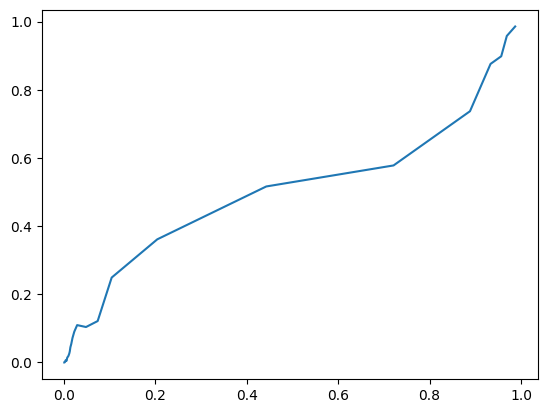

In [182]:
pctr, ctr, binspv = [], [], []


for i in range(1,51):
    if pctr == []:
        pctr.append(edge.numpy().tolist()[i]); ctr.append(clicks[i]/pvs[i]); binspv.append(pvs[i])
        continue
    
    if ctr[-1] > clicks.get(i,0)/pvs[i]:
        pctr[-1] = (pctr[-1] * binspv[-1] + edge.numpy().tolist()[i] * pvs[i] ) / (binspv[-1] + pvs[i])
        ctr[-1] = (ctr[-1] * binspv[-1] + clicks.get(i,0)) / (binspv[-1] + pvs[i])
    else:
        pctr.append(edge.numpy().tolist()[i])
        ctr.append(clicks.get(i,0)/pvs[i])
        
from matplotlib import pyplot as plt
plt.plot(pctr, ctr)

In [206]:
signature_dict = {
    inp.name : inp.type_spec
    for _ in inputs.values()
    for inp in _
}

pchain = ['4.99','9.99','14.99', '19.99', '29.99','49.99', '99.99']
price_chain_tensor = tf.constant(pchain, dtype=tf.string)
price = tf.constant([float(v) for v in pchain], dtype=tf.float32)
pctr_tensor, ctr_tensor = tf.constant(pctr, dtype=tf.float32), tf.constant(ctr, dtype=tf.float32)
@tf.function(input_signature=[signature_dict])
def serve(x):
    pred = model(x)
    bins = tfp.stats.find_bins(pred, pctr, extend_lower_interval = True, dtype = tf.int32)
    pred = tf.gather(ctr, bins) * price
    pred = tf.math.argmax(pred, axis = 1)
    pred = tf.gather(price_chain_tensor, pred)
    return pred

# model.save_weights(f'savedmodel/weights/dynamic_pricing/0.0.4/{ts}')
model.save(f'savedmodel/dynamic_pricing/0.0.4_expct_sir/{ts}', signatures=serve)


INFO:tensorflow:Assets written to: savedmodel/dynamic_pricing/0.0.4_expct_sir/1692845284/assets


INFO:tensorflow:Assets written to: savedmodel/dynamic_pricing/0.0.4_expct_sir/1692845284/assets


In [214]:
# @tf.function(input_signature=[signature_dict])
def serve(x):
    pred = model(x)
    bins = tfp.stats.find_bins(pred, pctr, extend_lower_interval = True, dtype = tf.int32)
    pred = tf.gather(ctr, bins) * price
    pred = tf.math.argmax(pred, axis = 1)
    # pred = tf.gather(price_chain_tensor, pred)
    return pred

In [215]:
x, y = next(iter(vs))

pred = serve(x)

In [216]:
pred

<tf.Tensor: shape=(1024,), dtype=int64, numpy=array([6, 1, 3, ..., 0, 3, 1])>

In [220]:
import pandas as pd
pd.Series(pred.numpy()).value_counts(), pd.Series(tf.math.argmax(y, axis = 1).numpy()).value_counts()

(1    412
 6    270
 3    178
 0    126
 4     24
 5     14
 Name: count, dtype: int64,
 1    440
 6    210
 3    140
 0    135
 5     47
 4     37
 2     15
 Name: count, dtype: int64)